### 군집(clustering)
* 레이블이 없는 데이터에 레이블을 부여하고자 할때 사용
* 비지도 학습으로 유사한 정도에 따라 다수의 객체를 그룹으로 만들때 사용
* 군집을 통해 레이블을 선정하여 지도학습으로 변경
* 군집의 개수 지정하는 방법
    - 감으로(해당 그룹의 개수를 미리 알고 있는 경우)
    - 평가지표로 확인(실루엣 지표 적용( -1 ~ 1사이, 1에 가까울수록 좋다)
    - 그래프 그려서 눈으로 확인

#### k-means
* k-means은 군집화(clustering)에서 가장 일반적으로 사용되는 알고리즘
* 거리기반 군집화다. 특정한 임의의 지점을 선택해 해당 중심에 가장 가까운 포인트들을 선택하는 군집화 기법

#### k-means 파라미터
* n_clusters : 가장 중요한 파라미터로 군집화할 개수를 정의한다.
* init : 초기에 군집 중심점의 좌표를 설정할 방식을 말하며 일반적으로 k-means++방식으로 최초 설정한다
* max_iter : 최대 반복 횟수이며, 이 횟수 이전에 모든 데이터의 중심점 이동이 없으면 종료한다.

#### 군집화가 완료되면 관련 주요 속성이 있다
* labels_ : 정답을 가지고 있는 변수(군집의 번호)
* cluster_centers_ : 각 군집 중심점 좌표(shape는[군집 개수, 피처 개수]), 이를 이용하면 군집 중심점 좌표가 어디인지 시각화 할 수 있다.

### 고객분류
* 고객들의 정보들을 가지고 있는 데이터 셋이다. 해당 데이터 셋을 이용하여 사용금액에 따른 고객을 분류하고자 한다.
* 분류 대상 : 연간 소득 대비 지출 점수를 통한 분류
* 컬럼
    - CustomerID : 고객 아이디
    - Gender : 성별
    - Age : 나이
    - Annual Income (k$) : 연간소득
    - Spending Score (1-100) : 지출 점수

* 참고 - 필요한 컬럼은 연간 소득과 지출 점수만 있으면 된다.

In [1]:
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv("data/Mall_Customers.csv")
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


### 그룹 개수 지정하기
* KElbowVisualizer(model, k(1,10)) :  해당 모델을 1~10 전 9개 사이의 그룹을 그래프로 표현해 준다 

In [3]:
#!pip install yellowbrick

In [4]:
from yellowbrick.cluster import KElbowVisualizer

In [5]:
df.columns

Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

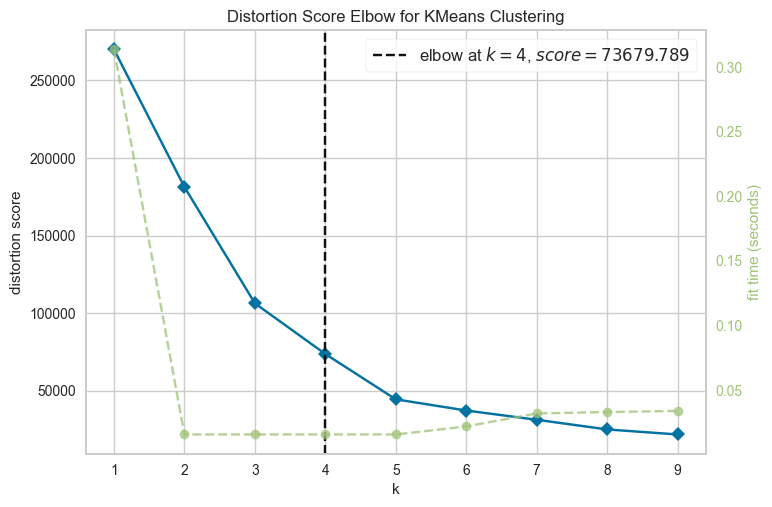

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [6]:
f = ['Annual Income (k$)', 'Spending Score (1-100)']

model = KMeans()
vis = KElbowVisualizer( model, k=(1,10) )
vis.fit( df[f] )
vis.show()

In [7]:
#!pip list
#!pip install threadpoolctl==3.1.0

In [8]:
from sklearn.metrics import silhouette_score

km = KMeans( n_clusters= 5 )
km.fit( df[f] )

silhouette_score(df[f], km.labels_ )

0.553931997444648

In [9]:
km.labels_

array([1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4,
       1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 2,
       1, 4, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 3, 0, 2, 0, 3, 0, 3, 0,
       2, 0, 3, 0, 3, 0, 3, 0, 3, 0, 2, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0,
       3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0,
       3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0,
       3, 0])

In [10]:
all_score = []
i = 1

while i < 10:
    i += 1
    km = KMeans( n_clusters = i )
    km.fit( df[f] )
    
    sil_score = silhouette_score( df[f], km.labels_ )
    
    score_dic = {"num": i, "score" : sil_score }
    all_score.append( score_dic )
score_df = pd.DataFrame(all_score)

In [11]:
score_df.sort_values("score")

,num,score
0,2,0.296897
8,10,0.441621
6,8,0.456970
7,9,0.461684
1,3,0.467614
2,4,0.493196
5,7,0.528810
4,6,0.537620
3,5,0.553932


In [12]:
km = KMeans( n_clusters=5, init="k-means++", max_iter=300 )
km.fit( df[f] )

KMeans(n_clusters=5)

In [13]:
set( km.labels_ )

{0, 1, 2, 3, 4}

In [14]:
df['cluster'] =km.labels_
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),cluster
0,1,Male,19,15,39,1
1,2,Male,21,15,81,4
2,3,Female,20,16,6,1
3,4,Female,23,16,77,4
4,5,Female,31,17,40,1


<Axes: xlabel='Annual Income (k$)', ylabel='Spending Score (1-100)'>

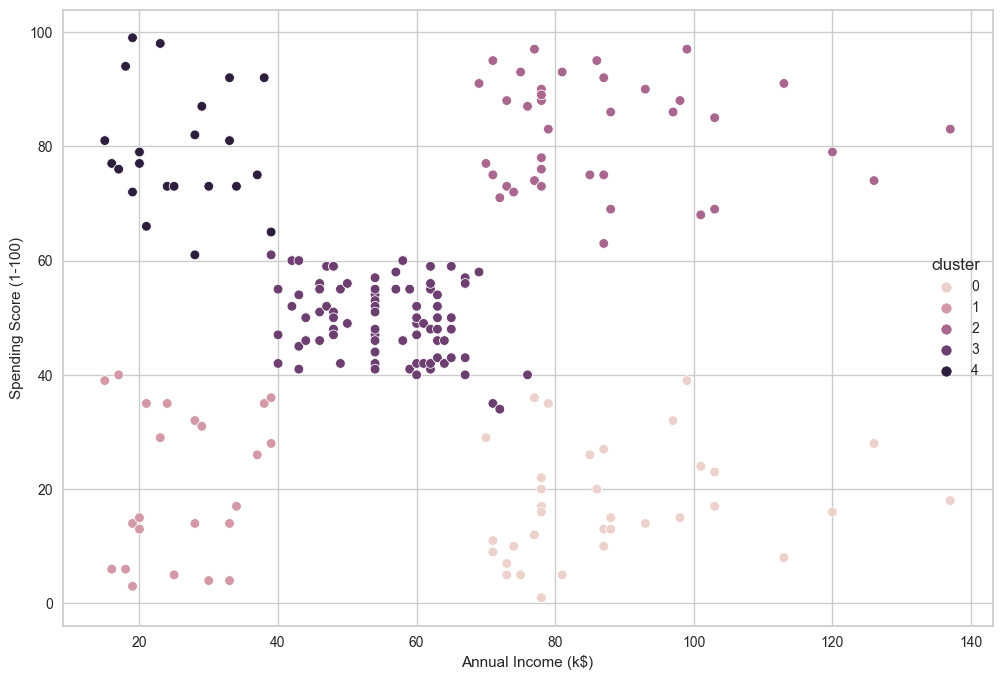

In [15]:
plt.figure( figsize=(12,8) )
sns.scatterplot( data=df, x="Annual Income (k$)" ,
                        y="Spending Score (1-100)", hue="cluster" )

In [16]:
center = km.cluster_centers_
center

array([[88.2       , 17.11428571],
       [26.30434783, 20.91304348],
       [86.53846154, 82.12820513],
       [55.2962963 , 49.51851852],
       [25.72727273, 79.36363636]])

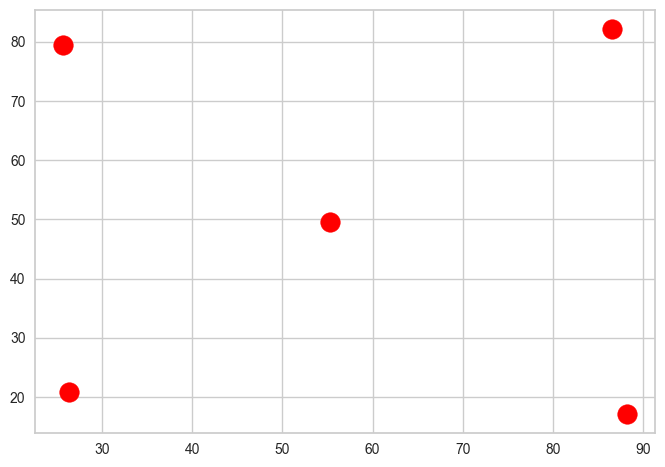

In [17]:
plt.scatter(x = center[:,0] , y = center[:,1] , c="red", s=200)

In [18]:
center[:,0]

array([88.2       , 26.30434783, 86.53846154, 55.2962963 , 25.72727273])

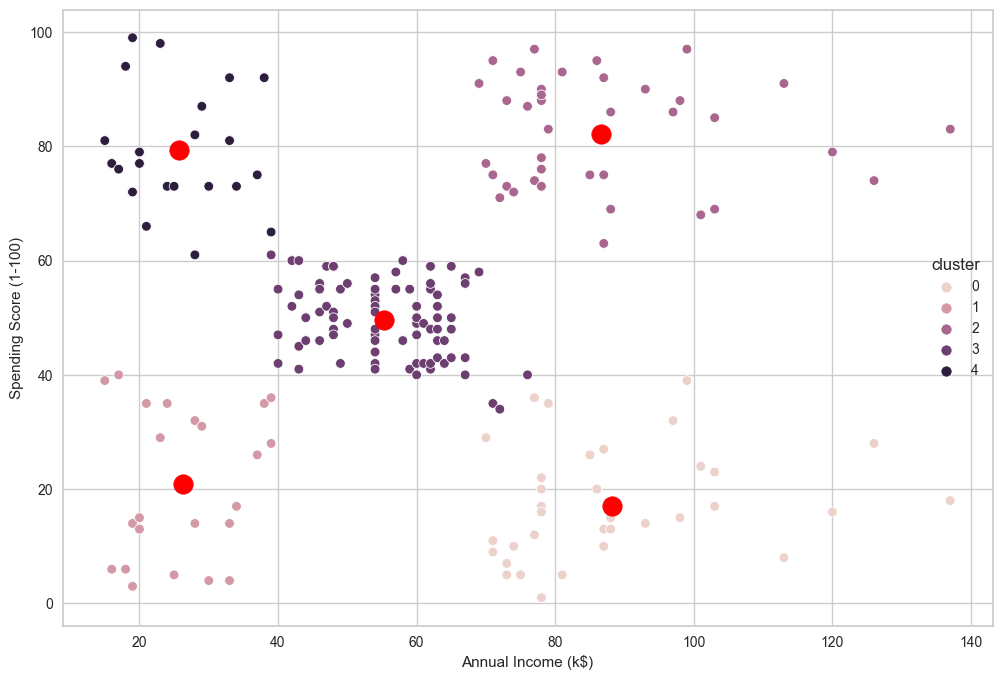

In [19]:
plt.figure( figsize=(12,8) )
sns.scatterplot( data=df, x="Annual Income (k$)" ,
                        y="Spending Score (1-100)", hue="cluster" )

plt.scatter(x = center[:,0] , y = center[:,1] , c="red", s=200)

In [20]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = \
        train_test_split(df[f], df['cluster'], test_size=0.3)

In [21]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

params = {
    'n_estimators':range(5,100,10),
    'max_depth' : range(4,11,2),
    'min_samples_leaf' : range(5,21,5),
    'min_samples_split' : range(4,21,4)
}

rfc = RandomForestClassifier()
grid_cv = GridSearchCV(rfc, param_grid=params, cv=3 )
grid_cv.fit( X_train, y_train )

print("최적의 파라미터 : ", grid_cv.best_params_ )
print("train : ", grid_cv.score(X_train, y_train ) )
print("test : ", grid_cv.score(X_test, y_test ) )


최적의 파라미터 :  {'max_depth': 4, 'min_samples_leaf': 5, 'min_samples_split': 12, 'n_estimators': 5}
train :  0.9785714285714285
test :  0.95


In [22]:
grid_cv.predict( [[ 100 , 60 ]] )

array([2])